### Import library

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os
os.chdir("C:\\Users\\idanh\\Documents\\תעונ שנה ד\\פרויקט גמר\\New test")


### read csv data file

In [26]:
df = pd.read_csv('all_features_df.csv').drop('Unnamed: 0', axis=1)

In [27]:
df.head()

,author_id,username,URL_bio,URL_bio_count,Curse_bio,Person_bio,Polarity_bio,PolarityPos_bio,PolarityNeg_bio,Subjectivity_bio,...,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2
0,868403933093306368,LanchasterDaisy,0,0,0,0,0.000,0,0,0.00,...,0.158020,0.822638,0.0,0.000000,0.000000,0.367443,0.0,0.285588,0.285870,0.000000
1,44649562,RevChrisDavis,1,1,0,0,0.000,0,0,0.00,...,0.409462,0.000000,0.0,0.000000,0.361377,0.501711,0.0,0.000000,0.517549,0.426822
2,2802698774,GordonSLynch,0,0,0,0,-0.050,0,1,0.85,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1598552382,Nourishdoc,0,0,0,0,0.625,1,0,0.50,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
4,4285087154,StephenCa2,0,0,0,0,0.000,0,0,0.00,...,0.177229,0.196771,0.0,0.187386,0.373254,0.463757,0.0,0.449624,0.379285,0.440851


In [28]:
df.info() #get info to check whether dataframe have non values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author_id               279 non-null    int64  
 1   username                279 non-null    object 
 2   URL_bio                 279 non-null    int64  
 3   URL_bio_count           279 non-null    int64  
 4   Curse_bio               279 non-null    int64  
 5   Person_bio              279 non-null    int64  
 6   Polarity_bio            279 non-null    float64
 7   PolarityPos_bio         279 non-null    int64  
 8   PolarityNeg_bio         279 non-null    int64  
 9   Subjectivity_bio        279 non-null    float64
 10  Hashtags_bio            279 non-null    int64  
 11  Mention_bio             279 non-null    int64  
 12  Length_bio              279 non-null    int64  
 13  Words_bio               279 non-null    int64  
 14  tweet_count             279 non-null    in

In [29]:
for col in df.columns:
    if len(df[col].unique())==1:
        print(col)

Curse_bio


In [31]:
df = df.drop(['author_id', 'username', 'URL_bio_count', 'Curse_bio'], axis=1)

KeyError: "['author_id' 'username' 'URL_bio_count' 'Curse_bio'] not found in axis"

                  URL_bio  Person_bio  Polarity_bio  PolarityPos_bio  \
URL_bio          1.000000    0.007814      0.001725         0.001316   
Person_bio       0.007814    1.000000      0.078775         0.114783   
Polarity_bio     0.001725    0.078775      1.000000         0.802737   
PolarityPos_bio  0.001316    0.114783      0.802737         1.000000   
PolarityNeg_bio -0.030933    0.146839     -0.426259        -0.264850   
...                   ...         ...           ...              ...   
5.2              0.018239   -0.064575      0.092749         0.058073   
6.2              0.124243   -0.033417      0.097074         0.112660   
7.2              0.166122   -0.059952      0.115850         0.137488   
8.2              0.101713    0.078219     -0.081546        -0.066554   
9.2             -0.096987    0.101072      0.019486         0.058044   

                 PolarityNeg_bio  Subjectivity_bio  Hashtags_bio  Mention_bio  \
URL_bio                -0.030933         -0.070170    

C:\Users\idanh\AppData\Local\Temp\ipykernel_10140\3499923723.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


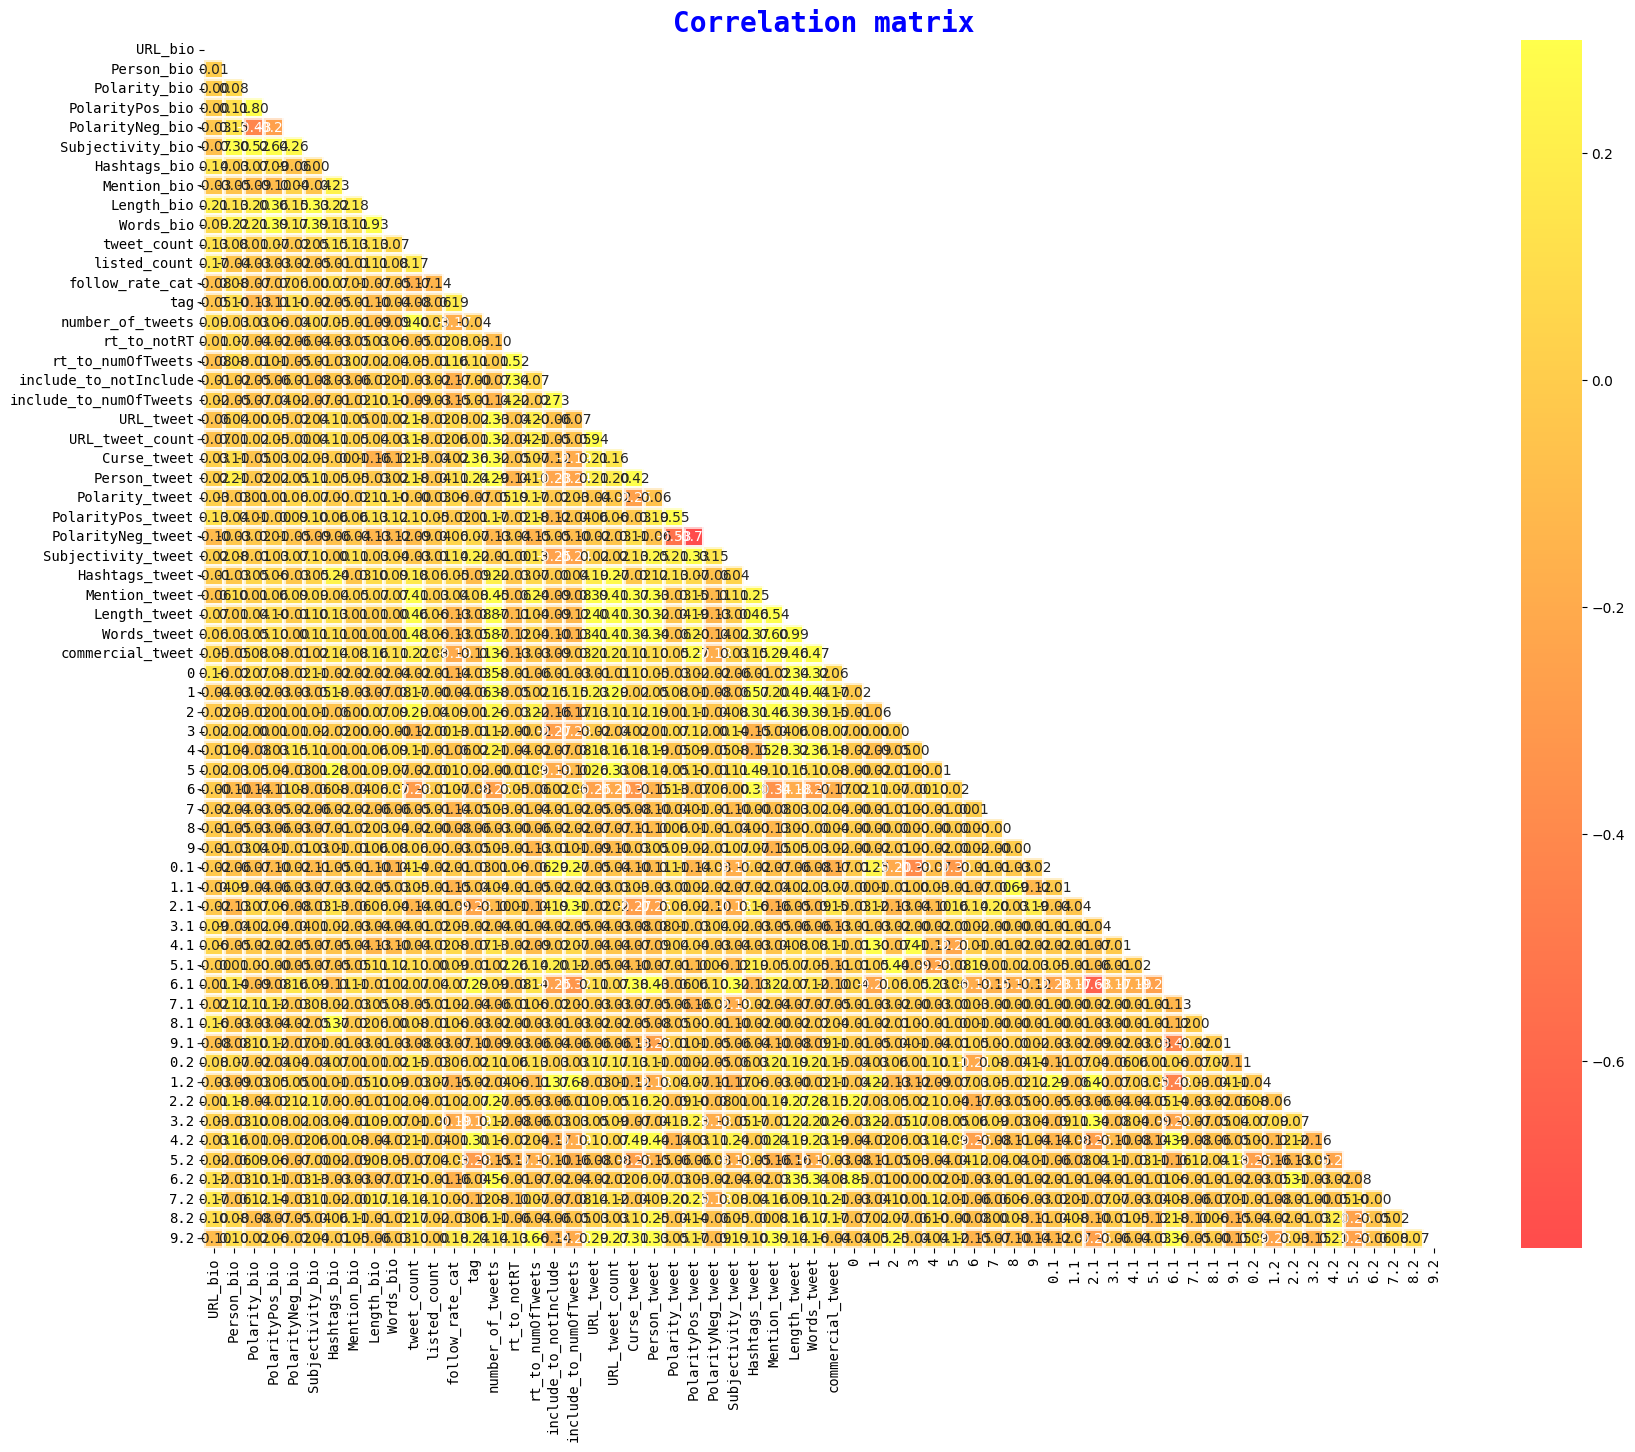

In [35]:
# Correlation matrix

df1 = df.copy()

cols = df1.columns

plt.figure(figsize = (20, 16), dpi = 100)

corr = df1.corr()
print(corr)

mask = np.zeros_like(corr, dtype=np.bool)
print(mask)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr,
            mask = mask,
            cmap = 'autumn',
            vmax=.3,
            annot = True,
            linewidths = 1.5,
            fmt = ".2f",
            alpha = 0.7)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = 'blue')

plt.show()

In [43]:
y = df['tag'] #get y as output model
X = df.drop(['tag'], axis=1) #get X as data to feed to model

C:\Users\idanh\AppData\Local\Temp\ipykernel_10140\2108765953.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax = ax)


array([[<AxesSubplot:title={'center':'URL_bio'}>,
        <AxesSubplot:title={'center':'Person_bio'}>,
        <AxesSubplot:title={'center':'Polarity_bio'}>,
        <AxesSubplot:title={'center':'PolarityPos_bio'}>,
        <AxesSubplot:title={'center':'PolarityNeg_bio'}>,
        <AxesSubplot:title={'center':'Subjectivity_bio'}>,
        <AxesSubplot:title={'center':'Hashtags_bio'}>,
        <AxesSubplot:title={'center':'Mention_bio'}>],
       [<AxesSubplot:title={'center':'Length_bio'}>,
        <AxesSubplot:title={'center':'Words_bio'}>,
        <AxesSubplot:title={'center':'tweet_count'}>,
        <AxesSubplot:title={'center':'listed_count'}>,
        <AxesSubplot:title={'center':'follow_rate_cat'}>,
        <AxesSubplot:title={'center':'number_of_tweets'}>,
        <AxesSubplot:title={'center':'rt_to_notRT'}>,
        <AxesSubplot:title={'center':'rt_to_numOfTweets'}>],
       [<AxesSubplot:title={'center':'include_to_notInclude'}>,
        <AxesSubplot:title={'center':'include_t

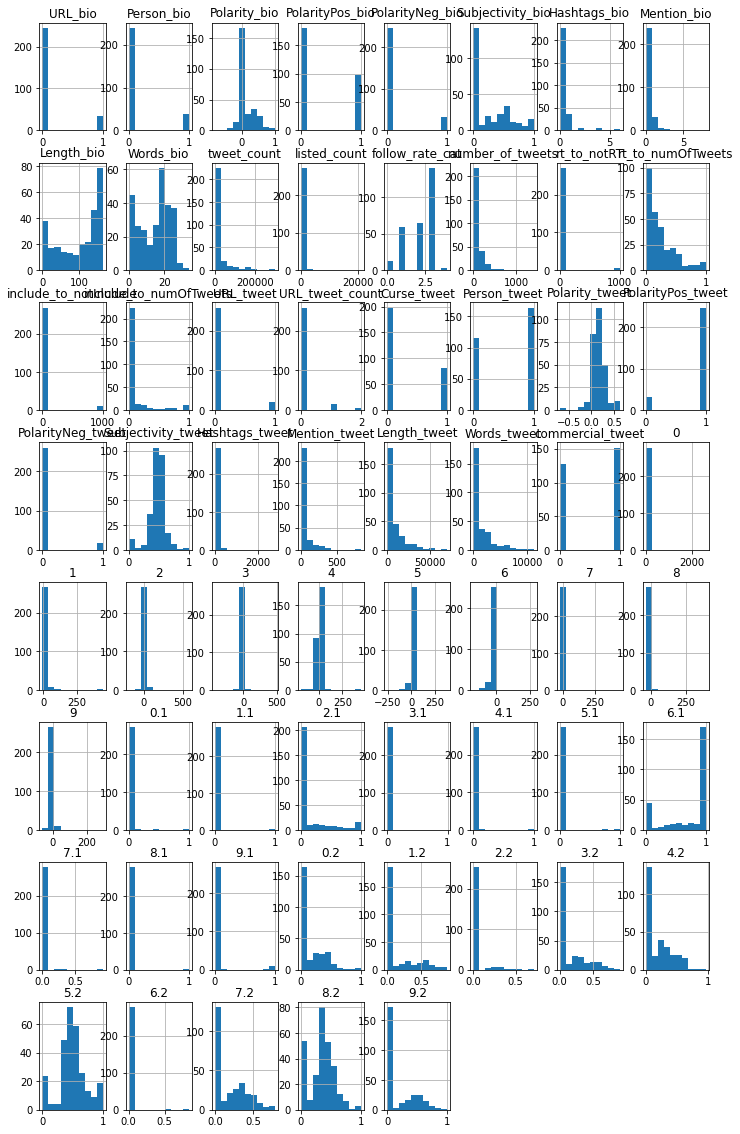

In [37]:
#Plot histogram to represent of the distribution of data
fig = plt.figure(figsize = (12,20))
ax = fig.gca()
X.hist(ax = ax)

<AxesSubplot:>

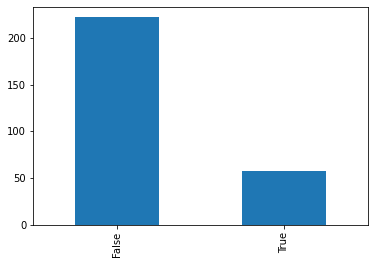

In [38]:
df['tag'].value_counts().plot(kind='bar') #plot bar chart to check imbalance data

<AxesSubplot:ylabel='tag'>

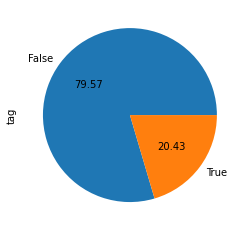

In [39]:
y.value_counts().plot.pie(autopct='%.2f') #plot pie chart

In [44]:
# changing tag from T F to 1 0
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)


0      False
1      False
2      False
3      False
4      False
       ...  
274    False
275     True
276    False
277    False
278    False
Name: tag, Length: 279, dtype: bool
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0]


### Split data to train and test

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
X_train.describe()
X_test.describe()
print(y_test)


[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0]


### Aplly standard scaler to scale value from -1 to 1

In [76]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Create model

In [55]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [56]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.7857142857142857
Accuracy score of logistic model is:  0.8095238095238095
Accuracy score of random forest model is:  0.9285714285714286


### Confusion matrix

Confusion matrix to metric model

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

These numbers are then organized into a table, or a matrix as follows: Expected down the side: Each row of the matrix corresponds to a predicted class. Predicted across the top: Each column of the matrix corresponds to an actual class.

true positives (TP): These are cases in which we predicted True, and they are True.<br>
true negatives (TN): We predicted False, and they are False.<br>
false positives (FP): We predicted True, but they are False.<br>
false negatives (FN): We predicted False, but they actually are True.

In [57]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

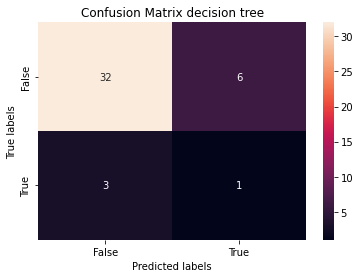

In [58]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 
ax.xaxis.set_ticklabels(['False','True']); ax.yaxis.set_ticklabels(['False','True']);

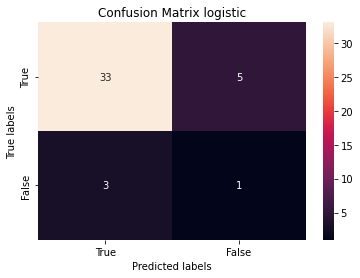

In [59]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic'); 
ax.xaxis.set_ticklabels(['False','True']); ax.yaxis.set_ticklabels(['False','True']);

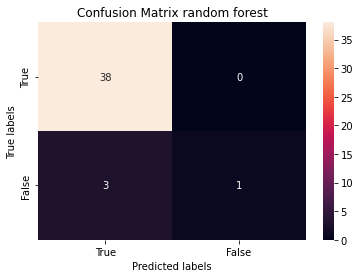

In [60]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix random forest'); 
ax.xaxis.set_ticklabels(['False','True']); ax.yaxis.set_ticklabels(['False','True']);

### Classification report to calculate some result

Accuracy: (TP+TN)/total

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.
Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)<br>
support mean total prediction

In [65]:
target_names =['False','True']
print("Report model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report model decision tree

              precision    recall  f1-score   support

       False       0.84      0.91      0.88        35
        True       0.25      0.14      0.18         7

    accuracy                           0.79        42
   macro avg       0.55      0.53      0.53        42
weighted avg       0.74      0.79      0.76        42



In [66]:
target_names = ['False','True']
print("Report model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report model logistic

              precision    recall  f1-score   support

       False       0.87      0.92      0.89        36
        True       0.25      0.17      0.20         6

    accuracy                           0.81        42
   macro avg       0.56      0.54      0.55        42
weighted avg       0.78      0.81      0.79        42



In [67]:
target_names = ['False','True']
print("Report model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report model random forest

              precision    recall  f1-score   support

       False       1.00      0.93      0.96        41
        True       0.25      1.00      0.40         1

    accuracy                           0.93        42
   macro avg       0.62      0.96      0.68        42
weighted avg       0.98      0.93      0.95        42



# Process data to get balance dataset

### Random undersampler

In [82]:
from sklearn import *
from imblearn.under_sampling import *

rs=RandomUnderSampler(sampling_strategy=1.0) #Sampling Startegy means the ratio
X_new, y_new = rs.fit_resample(X,y)

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (c:\users\idanh\pycharmprojects\final_project\venv\lib\site-packages\sklearn\base.py)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.15, random_state = 6)

In [111]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [112]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [113]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.6666666666666666
Accuracy score of logistic model is:  0.5555555555555556
Accuracy score of random forest model is:  0.8333333333333334


In [115]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

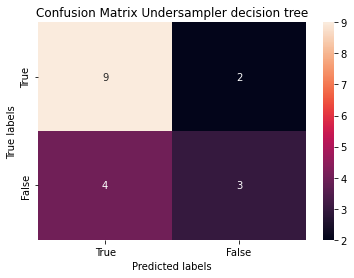

In [116]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

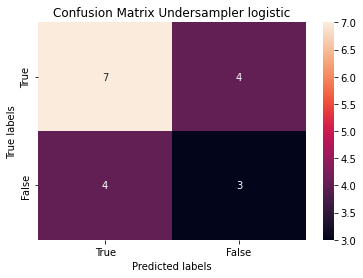

In [117]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

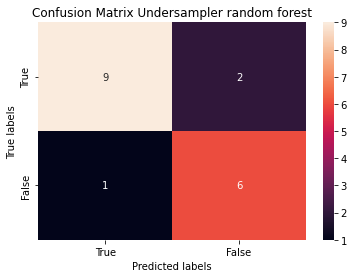

In [118]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Undersampler random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [119]:
target_names = ['True','False']
print("Report Undersampler model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report Undersampler model decision tree

              precision    recall  f1-score   support

        True       0.82      0.69      0.75        13
       False       0.43      0.60      0.50         5

    accuracy                           0.67        18
   macro avg       0.62      0.65      0.62        18
weighted avg       0.71      0.67      0.68        18



In [120]:
target_names = ['True','False']
print("Report Undersampler model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report Undersampler model logistic

              precision    recall  f1-score   support

        True       0.64      0.64      0.64        11
       False       0.43      0.43      0.43         7

    accuracy                           0.56        18
   macro avg       0.53      0.53      0.53        18
weighted avg       0.56      0.56      0.56        18



In [121]:
target_names = ['True','False']
print("Report Undersampler model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report Undersampler model random forest

              precision    recall  f1-score   support

        True       0.82      0.90      0.86        10
       False       0.86      0.75      0.80         8

    accuracy                           0.83        18
   macro avg       0.84      0.82      0.83        18
weighted avg       0.84      0.83      0.83        18



### SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X,y)

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (c:\users\idanh\pycharmprojects\final_project\venv\lib\site-packages\sklearn\base.py)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.15, random_state = 6)

In [196]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [197]:
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

fr = RandomForestClassifier(max_depth=9, n_estimators=1000)
fr.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [198]:
print("Accuracy score of decisiontree model is: ", decisiontree_classifier.score(X_test, y_test))
print("Accuracy score of logistic model is: ", logistic.score(X_test, y_test))
print("Accuracy score of random forest model is: ", fr.score(X_test, y_test))

Accuracy score of decisiontree model is:  0.835820895522388
Accuracy score of logistic model is:  0.8208955223880597
Accuracy score of random forest model is:  0.9402985074626866


In [199]:
decisiontree_classifier_pred = decisiontree_classifier.predict(X_test)
cm_tree = confusion_matrix(y_test, decisiontree_classifier_pred)

logistic_pred = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

fr_pred = fr.predict(X_test)
cm_fr = confusion_matrix(y_test, fr_pred)

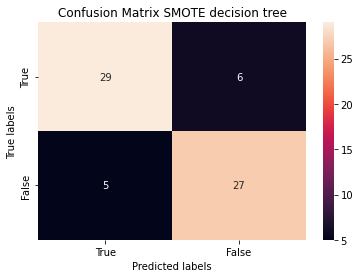

In [200]:
ax= plt.subplot()
sns.heatmap(cm_tree, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE decision tree'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

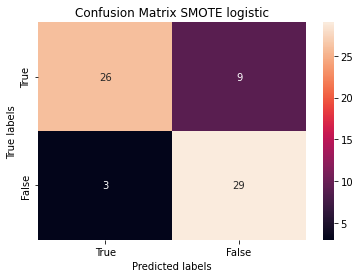

In [201]:
ax= plt.subplot()
sns.heatmap(cm_logistic, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE logistic'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

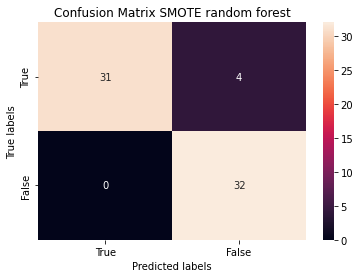

In [202]:
ax= plt.subplot()
sns.heatmap(cm_fr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SMOTE random forest'); 
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);

In [203]:
target_names = ['True','False']
print("Report SMOTE model decision tree\n")
print(classification_report(decisiontree_classifier_pred, y_test, target_names=target_names))

Report SMOTE model decision tree

              precision    recall  f1-score   support

        True       0.83      0.85      0.84        34
       False       0.84      0.82      0.83        33

    accuracy                           0.84        67
   macro avg       0.84      0.84      0.84        67
weighted avg       0.84      0.84      0.84        67



In [204]:
target_names = ['True','False']
print("Report SMOTE model logistic\n")
print(classification_report(logistic_pred, y_test, target_names=target_names))

Report SMOTE model logistic

              precision    recall  f1-score   support

        True       0.74      0.90      0.81        29
       False       0.91      0.76      0.83        38

    accuracy                           0.82        67
   macro avg       0.82      0.83      0.82        67
weighted avg       0.84      0.82      0.82        67



In [205]:
target_names = ['True','False']
print("Report SMOTE model random forest\n")
print(classification_report(fr_pred, y_test, target_names=target_names))

Report SMOTE model random forest

              precision    recall  f1-score   support

        True       0.89      1.00      0.94        31
       False       1.00      0.89      0.94        36

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.95      0.94      0.94        67

